In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
%matplotlib inline

In [109]:
os.chdir('C:\\Users\\ARPIT SHARMA\\Desktop\\lgm\\LGMVIP--DataScience-Image to Pencil Sketch with Python\\Org_images')

In [110]:
img_list=os.listdir()
print(img_list)

['1783942.jpg', '484260.jpg', '7d57db7c144197185d8f459d60cca0ae.jpg', 'Lonely-Woman-Hourglass-Reflection-Scenic-AI-Generated-4K-Desktop-Wallpaper.jpg', 'wallpaperflare.com_wallpaper (1).jpg', 'wallpaperflare.com_wallpaper (2).jpg', 'wallpaperflare.com_wallpaper.jpg']


### Checking Size of Images

In [111]:
for img in img_list:
    im = cv2.imread(img,0)
    h,w = im.shape[:2]
    print(im.shape)

(1080, 1920)
(1080, 1920)
(1080, 1920)
(2160, 3840)
(1152, 2048)
(1440, 2560)
(1152, 2048)


### Resizing the images to 1080, 1920

In [114]:
for img in img_list:
    os.chdir("C:\\Users\\ARPIT SHARMA\\Desktop\\lgm\\LGMVIP--DataScience-Image to Pencil Sketch with Python\\Org_images")
    im=cv2.imread(img)
    #in resize we have width first and height second which is opposite when we print shape of a image
    r_img = cv2.resize(im,(1920 ,1080))
    os.chdir("C:\\Users\\ARPIT SHARMA\\Desktop\\lgm\\LGMVIP--DataScience-Image to Pencil Sketch with Python\\Resized Images")
    output_path = img
    cv2.imwrite(output_path, r_img)
    
    h,w = r_img.shape[:2]
    print(r_img.shape)

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


#### Note cwd is now Resized images from here on out

### Applying Grayscale

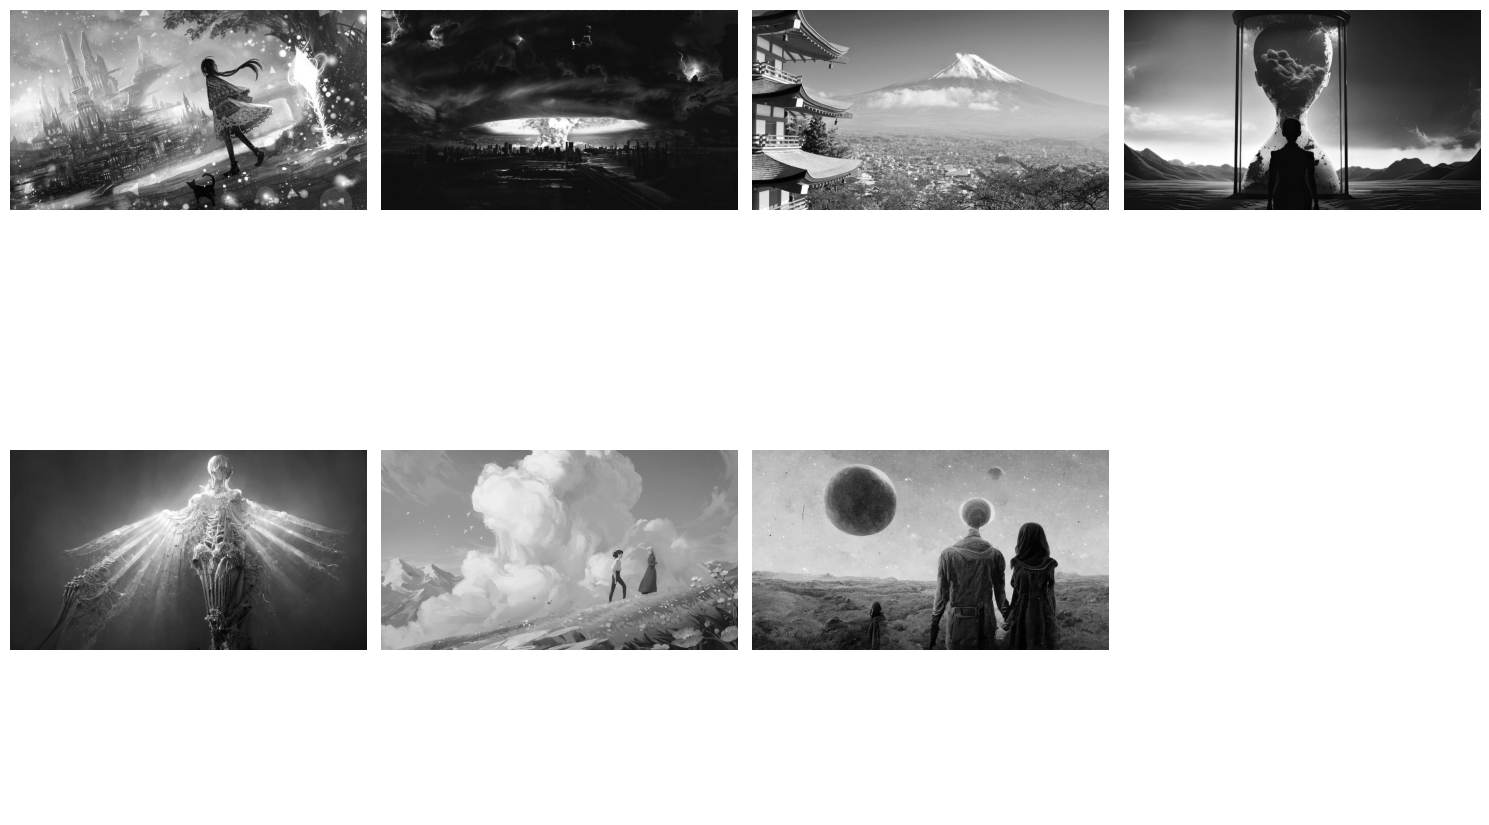

In [116]:
num_images = len(img_list)
num_rows = 2
num_cols = (num_images + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i,img in enumerate(img_list):
    #Converting img BGR TO GRAYSCALE
    img=cv2.imread(img)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    row = i // num_cols
    col = i % num_cols

    axes[row,col].imshow(gray_image,cmap="gray")
    axes[row,col].axis("off")

axes[1,3].axis("off")    
    
plt.tight_layout()
plt.show()

### Invert the grayscale image to create a negativ

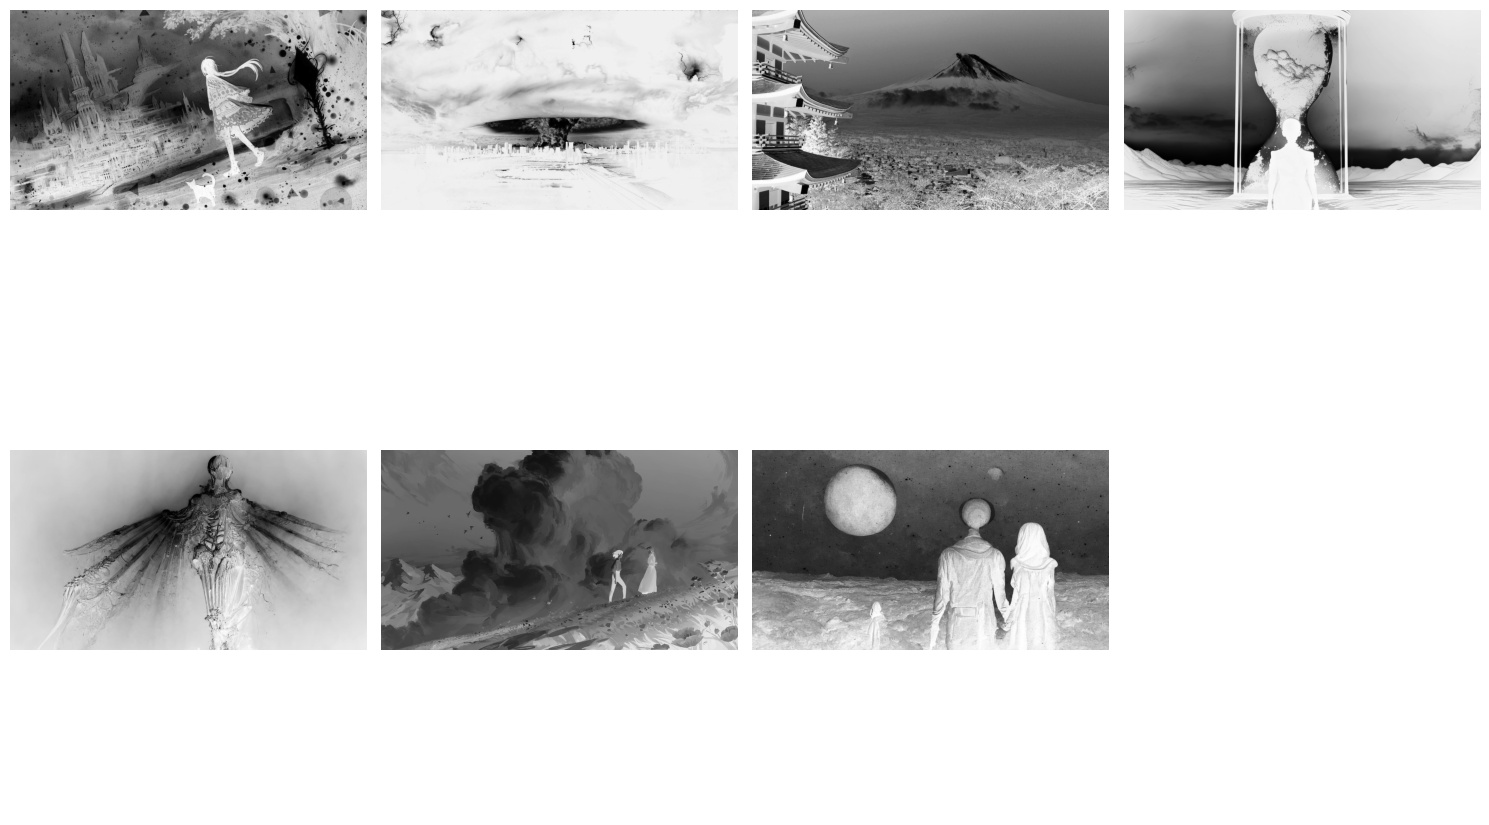

In [117]:
num_images = len(img_list)
num_rows = 2
num_cols = (num_images + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i,img in enumerate(img_list):
    #Converting img BGR TO GRAYSCALE
    img=cv2.imread(img)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted_gray_image = 255 - gray_image
    row = i // num_cols
    col = i % num_cols

    axes[row,col].imshow(inverted_gray_image,cmap="gray")
    axes[row,col].axis("off")

axes[1,3].axis("off")    
    
plt.tight_layout()
plt.show()

### Apply Gaussian blur to the negative image

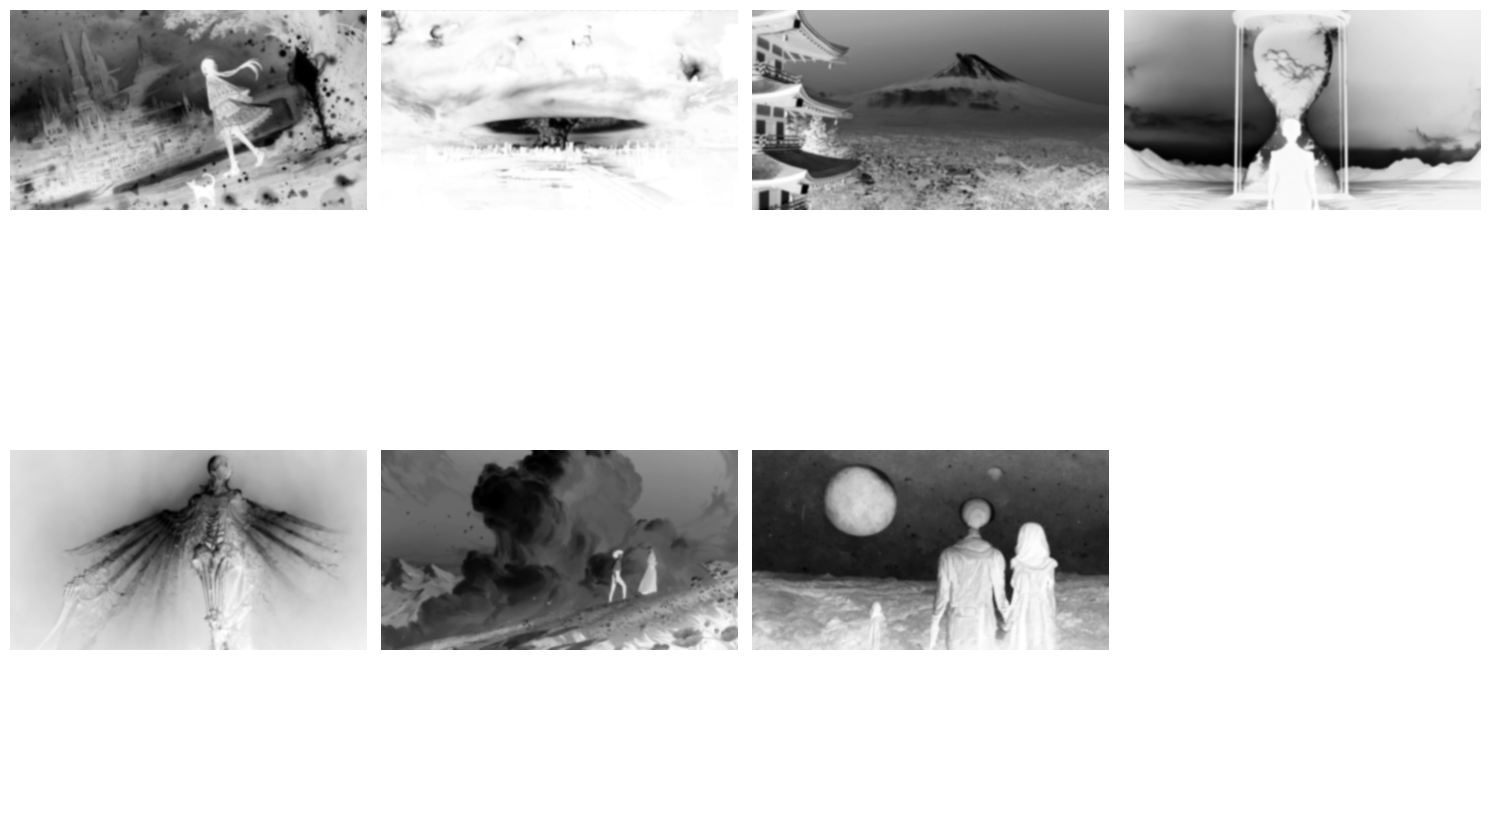

In [122]:
num_images = len(img_list)
num_rows = 2
num_cols = (num_images + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
# Pre-Adjusting kernel_size
kernel_size=(31,31)
for i,img in enumerate(img_list):
    #Converting img BGR TO GRAYSCALE
    img=cv2.imread(img)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted_gray_image = 255 - gray_image
    blurred_image = cv2.GaussianBlur(inverted_gray_image, kernel_size, sigmaX=0, sigmaY=0)
    row = i // num_cols
    col = i % num_cols

    axes[row,col].imshow(blurred_image,cmap="gray")
    axes[row,col].axis("off")

axes[1,3].axis("off")    
    
plt.tight_layout()
plt.show()

### Invert the blurred negative image

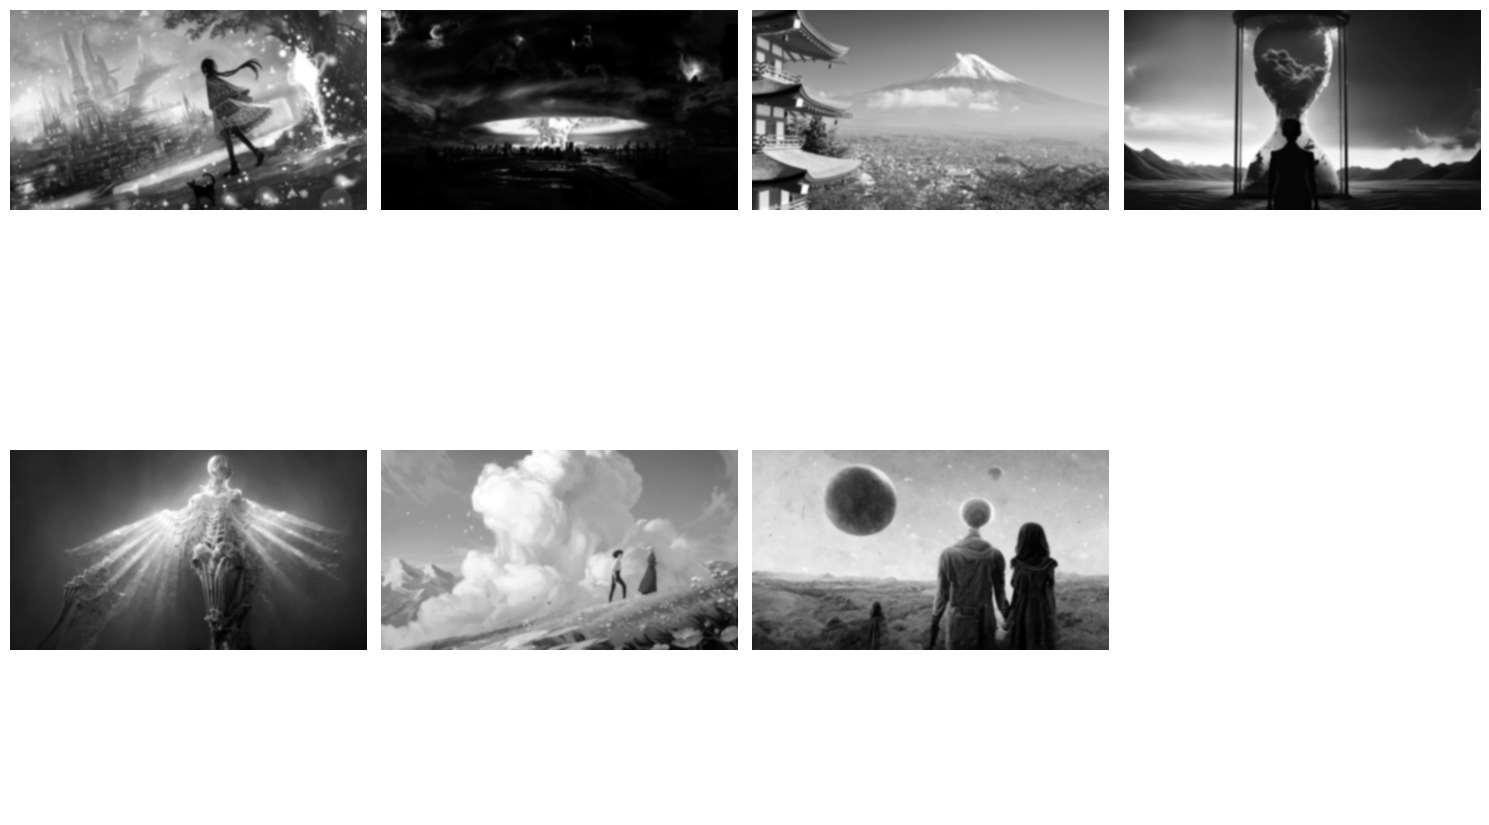

In [123]:
num_images = len(img_list)
num_rows = 2
num_cols = (num_images + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Pre-Adjusting kernel_size
kernel_size=(31,31)
for i,img in enumerate(img_list):
    #Converting img BGR TO GRAYSCALE
    img=cv2.imread(img)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted_gray_image = 255 - gray_image
    blurred_image = cv2.GaussianBlur(inverted_gray_image, kernel_size, sigmaX=0, sigmaY=0)
    inverted_blurred_image = 255 - blurred_image
    row = i // num_cols
    col = i % num_cols

    axes[row,col].imshow(inverted_blurred_image,cmap="gray")
    axes[row,col].axis("off")

axes[1,3].axis("off")    
    
plt.tight_layout()
plt.show()

In [ ]:
def sketch_images(images_list):
    try:
        for i,img in enumerate(images_list):
            image=cv2.imread(img)
            #Converting img BGR TO RGB
            org_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            #Converting img BGR TO GRAYSCALE
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Invert the blurred negative image
            inverted_gray_image = 255 - gray_image
            # Applying GaussianBlur
            blurred_image = cv2.GaussianBlur(inverted_gray_image, kernel_size, sigmaX=0, sigmaY=0)
            #Inverted blur img ie 255 - gaussianblur images
            inverted_blurred_image = 255 - blurred_image
            #div of org_img by inverted gaussian 
            sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale=256)
            alpha = 1  # Increasing contrast
            sketch_image = cv2.multiply(sketch_image, alpha)
            return sketch_image
    except:
        print("provide list of i")

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

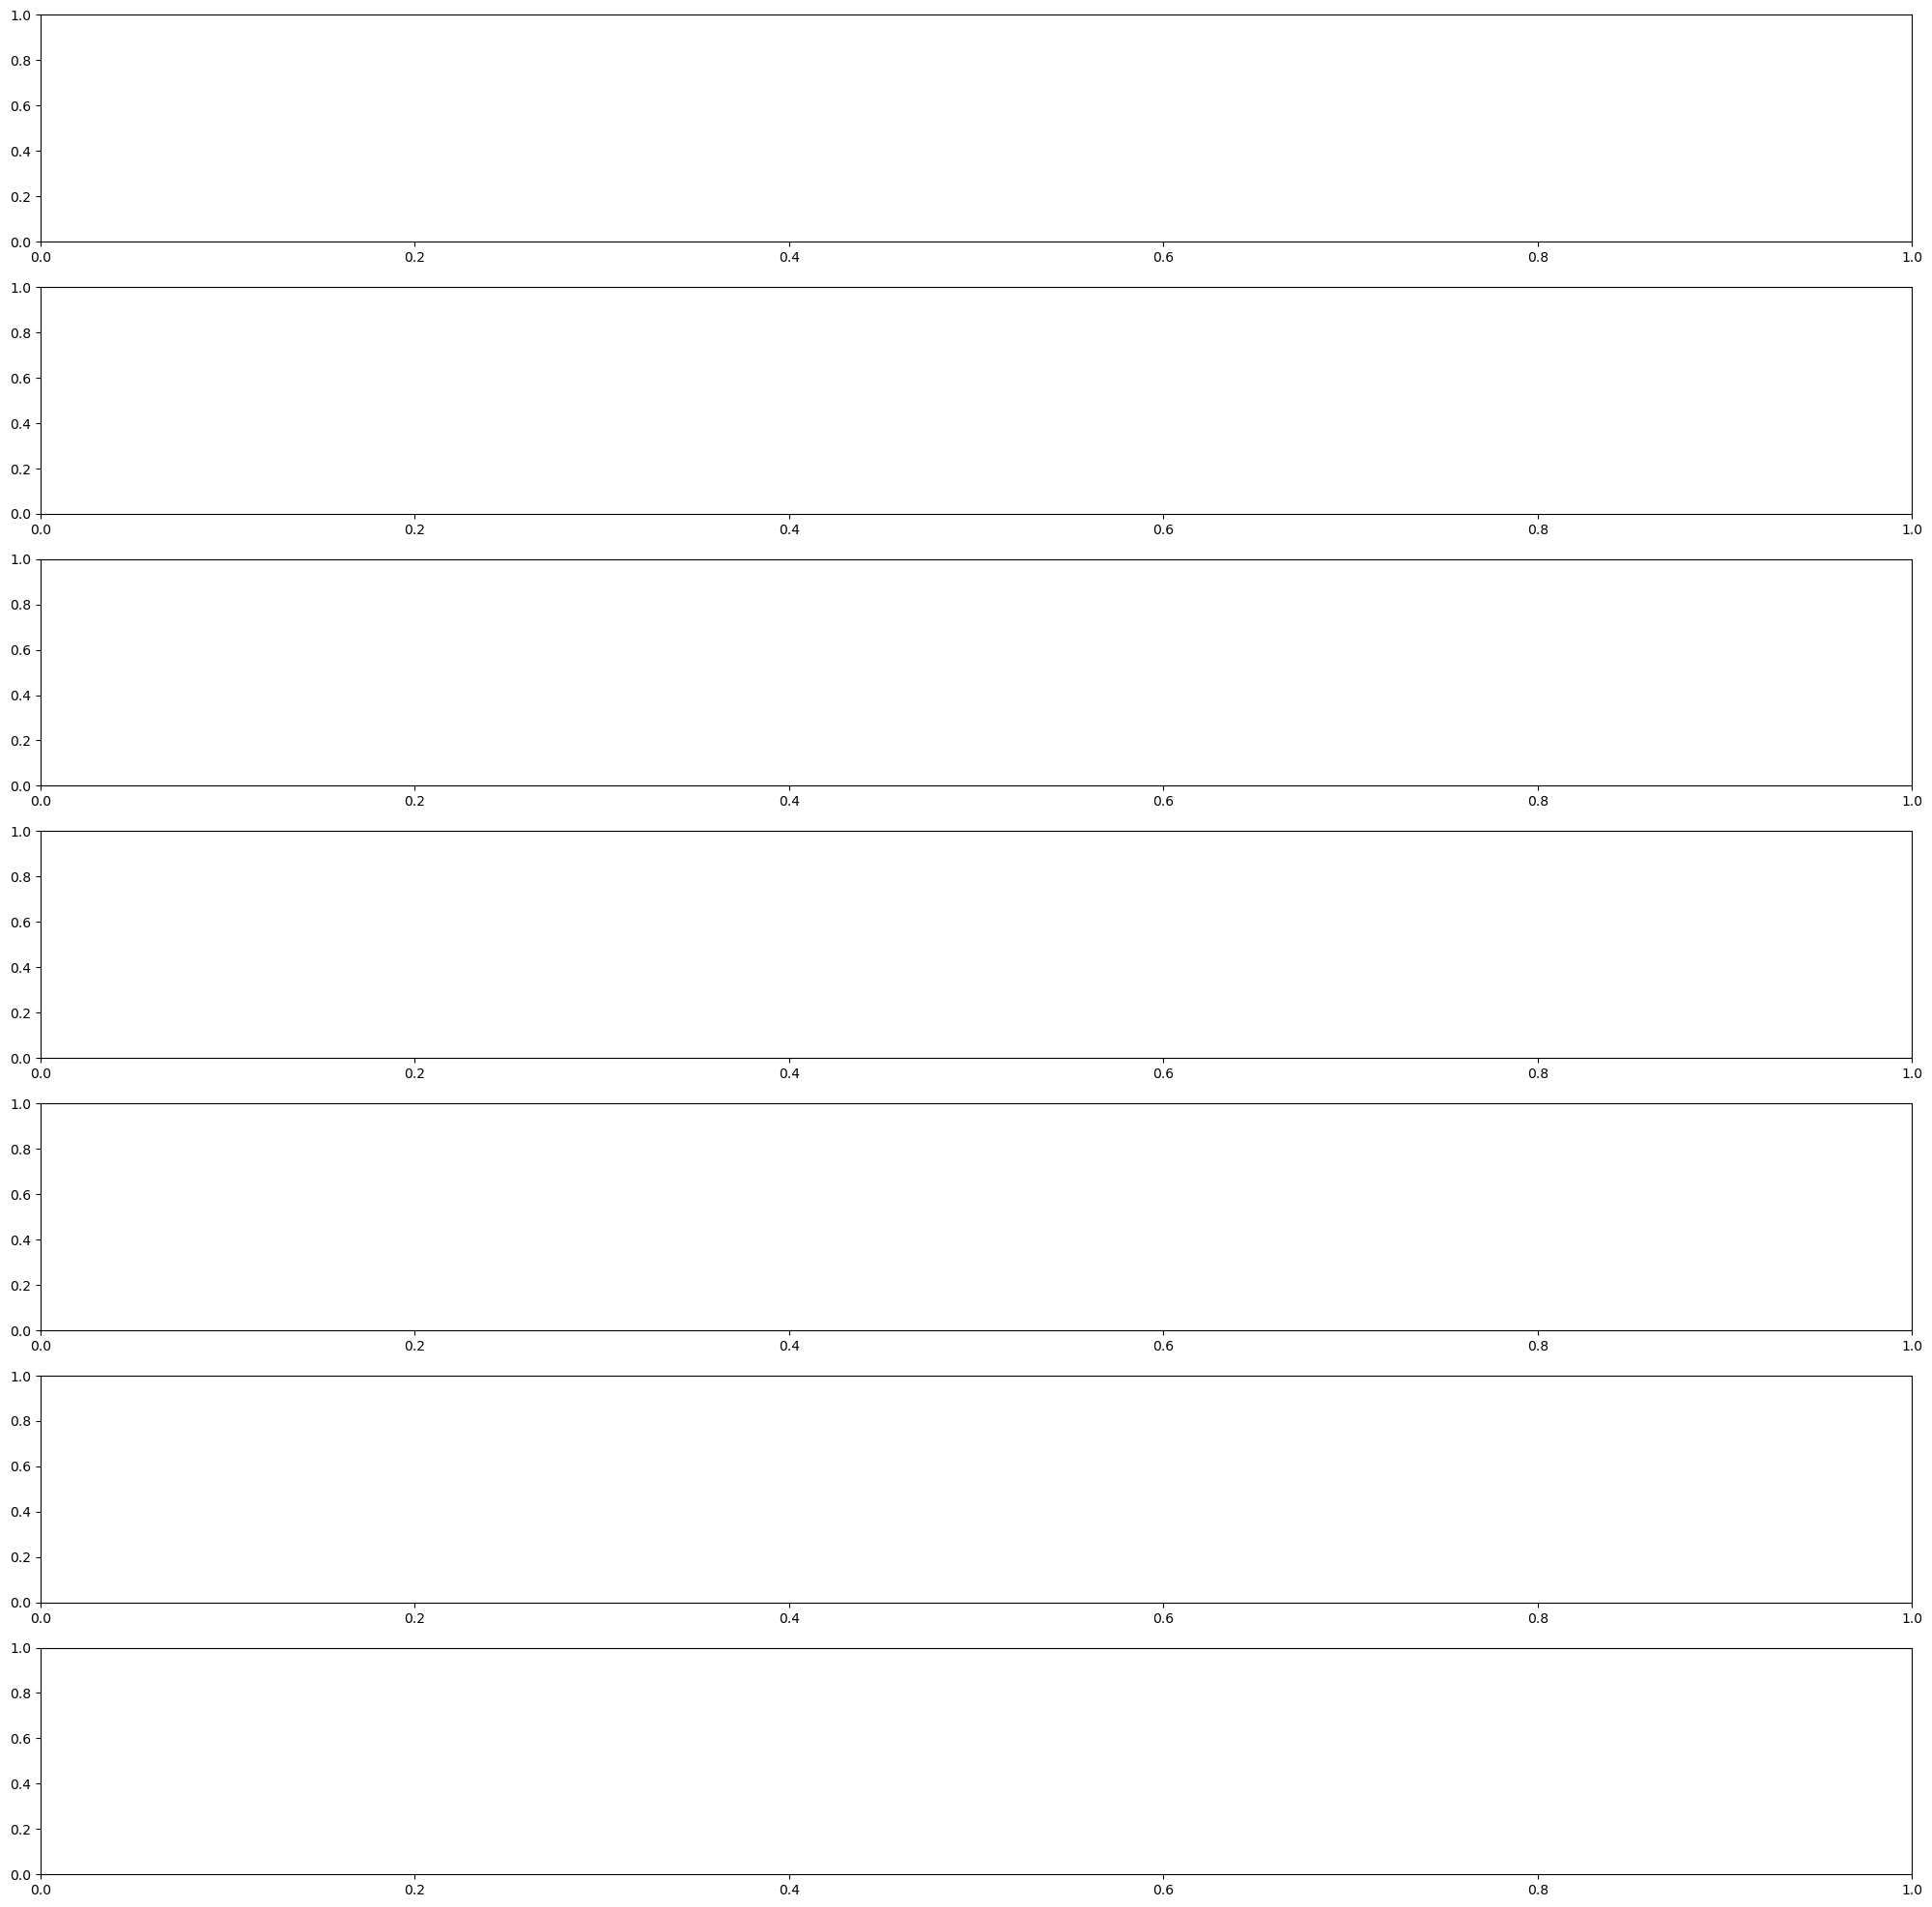

In [134]:
num_images = len(img_list)
num_rows = 7

fig, axes = plt.subplots(num_rows,1, figsize=(25, 25))

# Pre-Adjusting kernel_size
kernel_size=(51,51)
    #plt images side by side
    combined_image = np.hstack((org_img, sketch_image))
    axes[i].imshow(combined_image)
    axes[i].axis("off")
    
plt.tight_layout()
plt.show()